In [314]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

1. load Data
2. Categorical Encoding - One hot encoding / Binary Encoding / Label Encoding
3. Independent / Dependent Variables
4. Find Correlations - Heatmap
5. Hypothesis testing - summary
6. Variable Inflation Factor(VIF)
7. Train Test Split
8. Training the model
9. Checking for overfitting
10. make predictions
11. Confusion Matrix
12. Check For Accuracy - Classification Report
13. AUC-ROC Graph

In [315]:
df = pd.read_csv('D:\\PROGRAMMING\\Datasets\\bank.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [316]:
## Checking for the variables' no of unique values
my_dict = dict(sorted(df.nunique().items(), key = lambda x: x[1]))
my_dict
## Here:
## df.nunique().items() returns the sequence of key value pairs
## x[1] retrives the values values from the key-value pairs
## lambda function is used to specify that we want to sort based on values
## sorted() will sort key-value pairs based on values using the lambda function as a key

{'contact': 2,
 'y': 2,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'poutcome': 3,
 'marital': 4,
 'day_of_week': 5,
 'education': 8,
 'previous': 8,
 'month': 10,
 'emp_var_rate': 10,
 'nr_employed': 11,
 'job': 12,
 'cons_price_idx': 26,
 'cons_conf_idx': 26,
 'pdays': 27,
 'campaign': 42,
 'age': 78,
 'euribor3m': 316,
 'duration': 1544}

In [317]:
for k in my_dict.keys():
    print(k, "--->  ",df[k].unique())
    if(k == 'education'):
        break

contact --->   ['cellular' 'telephone']
y --->   [0 1]
default --->   ['unknown' 'no' 'yes']
housing --->   ['yes' 'no' 'unknown']
loan --->   ['no' 'yes' 'unknown']
poutcome --->   ['nonexistent' 'success' 'failure']
marital --->   ['married' 'single' 'divorced' 'unknown']
day_of_week --->   ['thu' 'fri' 'tue' 'mon' 'wed']
education --->   ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [318]:
## Now here we want to replace change the all types of basics in education to only basic
df['education'] = df['education'].str.replace('.*c\..*', 'basic', regex=True)

print(df['education'].value_counts())
print()
print(df['education'].unique())

education
basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64

['basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


<h2>Data Exploration</h2>

In [319]:
## Checking for biasness , imbalanced or balanced
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

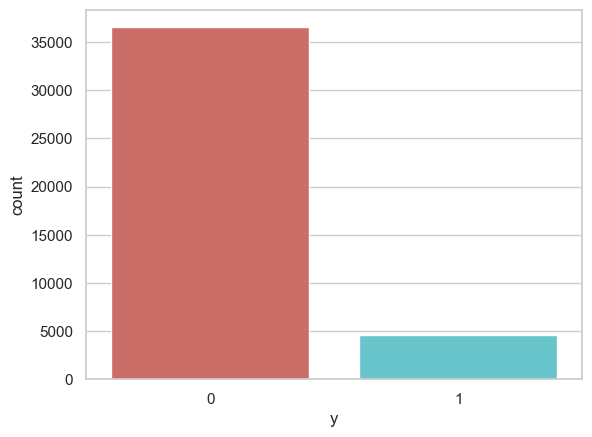

In [320]:
sb.countplot(x='y', data=df, palette='hls')
plt.show()

In [321]:
no_of_zeros = len(df[df['y']==0])
no_of_ones = len(df[df['y']==1])
print("Percentage of 0's : ", ((no_of_zeros / (no_of_zeros + no_of_ones)) * 100).__round__(2))
print("Percentage of 1's : ", ((no_of_ones / (no_of_zeros + no_of_ones)) * 100).__round__(2))

## Here
## Our Data is Imbalanced

Percentage of 0's :  88.73
Percentage of 1's :  11.27


In [322]:
##### Lets' Do Some More Exploration
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Perform groupby and calculate the mean
numeric_df.groupby('y').mean()

## Here
## The Average Age of customers who brought the term deposit is higher than those who didn't. 

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [323]:
numeric_columns = df.select_dtypes(include='number').columns

In [324]:
df.groupby('job')[numeric_columns].mean().reset_index()

,job,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
1,blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
2,entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
3,housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
4,management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
5,retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
6,self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
7,services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
8,student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286
9,technician,38.507638,250.232241,2.577339,964.408127,0.153789,0.274566,93.561471,-39.927569,3.820401,5175.648391,0.108260


In [325]:
df.groupby('marital')[numeric_columns].mean().reset_index()

,marital,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
1,married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
2,single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
3,unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [326]:
df.groupby('education')[numeric_columns].mean().reset_index()

,education,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
1,high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
2,illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
3,professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
4,university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
5,unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


<h2>Visualization</h2>

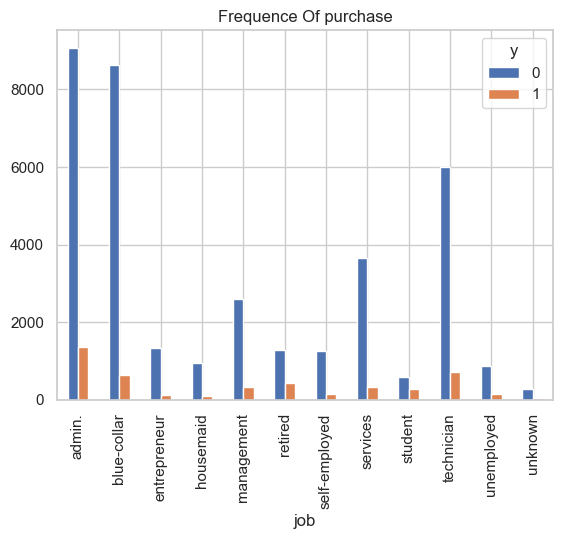

In [327]:
pd.crosstab(df.job, df.y).plot(kind='bar')
plt.title("Frequence Of purchase")
plt.show()

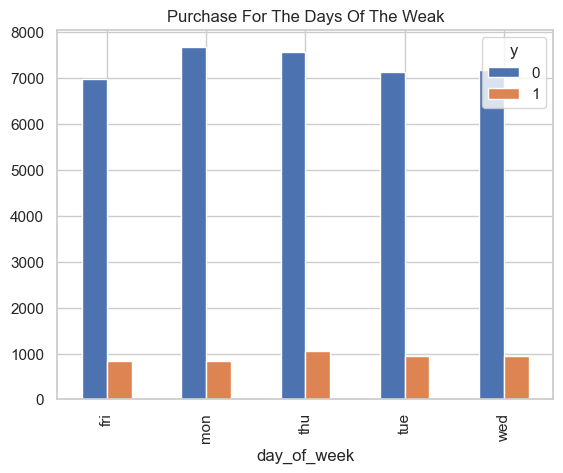

In [328]:
pd.crosstab(df.day_of_week, df.y).plot(kind='bar')
plt.title('Purchase For The Days Of The Weak')
plt.show()

<h2>Handling Imbalanced Data</h2>

<h5> Creating Dummies </h5>

In [329]:
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(df[var], prefix=var)
#     data1=df.join(cat_list)
#     df=data1
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# data_vars=df.columns.values.tolist()
# keep=[i for i in data_vars if i not in cat_vars]
# f_df = df[keep]


In [330]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
f_df = df.copy()
for k in cat_vars:
    f_df = pd.get_dummies(f_df, columns=[k])
# f_df = f_df.replace({True:1, False:0})
f_df.shape


(41188, 62)

In [331]:
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# data_vars=f_df.columns.values.tolist()
# keep=[i for i in data_vars if i not in cat_vars]
# f_df = f_df[keep]

In [332]:
f_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


<h5> SMOTE (Synthetic Minority Oversampling Technique) </h5>

In [333]:
from imblearn.over_sampling import SMOTE

In [334]:
## Independent / Dependent Variable
X = f_df.loc[:, f_df.columns != 'y']
y = f_df.loc[:, f_df.columns == 'y']
os = SMOTE(random_state=0)

In [335]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)     ## Applying only on Training

os_data_X = pd.DataFrame(data = os_data_X, columns=columns)
os_data_y = pd.DataFrame(data = os_data_y, columns=['y'])

In [336]:
## Here we can check
print("The length of oversampled data : ", len(os_data_X))
print("The no of NO subscriptions are : ", len(os_data_y[os_data_y['y']==0]))
print("The no of subscriptions are    : ", len(os_data_y[os_data_y['y']==1]))
print("proportion of No subscriptions : ", len(os_data_y[os_data_y['y']==0]) / len(os_data_X))
print("proportion of subscriptions is : ", len(os_data_y[os_data_y['y']==1]) / len(os_data_X))

## Here
## We have perfect balanced data

The length of oversampled data :  51134
The no of NO subscriptions are :  25567
The no of subscriptions are    :  25567
proportion of No subscriptions :  0.5
proportion of subscriptions is :  0.5


<h5> Recursive Feature Elimination (RFE) </h5>

RFE is based on the idea to repeatedly construct a model and choose either the best and wrost performing features, setting the feature aside and repeat the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

The Goal of RFE is to select Features by recursively selecting smaller and smaller set of features.

In [337]:
from sklearn.feature_selection import RFE

f_df_vars = f_df.columns.values.tolist()
X = [k for k in f_df_vars if k not in y]
y = ['y']

In [338]:
## Applying Logistice Regression
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
# print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]


In [339]:
selected_features = os_data_X.columns[rfe.support_]
selected_features_names = list(selected_features)
selected_features_names

['marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

In [340]:
X = os_data_X[selected_features_names]
y = os_data_y['y']

<h2> Implementing The Model </h2>

In [341]:
est = sm.Logit(y, X).fit()
print(est.summary2())

Optimization terminated successfully.
         Current function value: 0.523609
         Iterations 7
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.245     
Dependent Variable:           y                         AIC:                       53586.4321
Date:                         2023-07-18 23:00          BIC:                       53754.4340
No. Observations:             51134                     Log-Likelihood:            -26774.   
Df Model:                     18                        LL-Null:                   -35443.   
Df Residuals:                 51115                     LLR p-value:               0.0000    
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               7.0000                                                         
--------------------------------------------------------------------------------------------

In [345]:
## Now remove those variables whose p_value is > 0.05
X = X.drop(['marital_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_unknown'], axis=1)
X.head()

,marital_divorced,marital_married,marital_single,education_basic,education_high.school,education_professional.course,education_university.degree,education_unknown,loan_no,loan_yes,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False
1,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False
2,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False
3,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False
4,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False


In [346]:
print((sm.Logit(y, X).fit()).summary())

Optimization terminated successfully.
         Current function value: 0.532955
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51119
Method:                           MLE   Df Model:                           14
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2311
Time:                        23:06:43   Log-Likelihood:                -27252.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                 -0.5003      0.040    -12.660      0.

<h3> Logistic Regression Model Fitting </h3>

In [349]:
scale = StandardScaler()
X_Scaled = scale.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns=X.columns)

In [350]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [352]:
## Predicting the test set result
y_pred = logreg.predict(X_test)

final = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual', 'Predicted'])
final

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
15336,1,1
15337,0,0
15338,1,1
15339,1,1


In [360]:
## Checking For Overfitting by Printing The accuracy of model
print("The Accuracy Score is for train : ", end="")
print((logreg.score(X_train, y_train)).__round__(4)*100, "%")
print("The Accuracy Score is for test  : ", end="")
print((logreg.score(X_test, y_test)).__round__(4)*100, "%")

The Accuracy Score is for train : 92.52 %
The Accuracy Score is for test  : 92.43 %


<h3> Confusion Matrix </h3>

In [362]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[7666    0]
 [1161 6514]]


In [ ]:
# TN : 7666
# FP : 0
# FN : 1161
# TP : 6515

## The result is showing that we have 7666+6514 Correct predictions and 0+1161 Incorrect Predictions

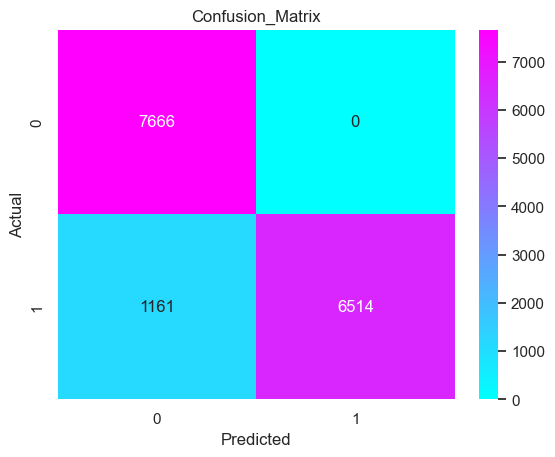

In [365]:
sb.heatmap(matrix, annot=True, cmap='cool', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_Matrix")
plt.show()

<h3> Classification Report </h3>

In [366]:
print("Classification Report is : ")
print(metrics.classification_report(y_test, y_pred))

Classification Report is : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7666
           1       1.00      0.85      0.92      7675

    accuracy                           0.92     15341
   macro avg       0.93      0.92      0.92     15341
weighted avg       0.93      0.92      0.92     15341



In [ ]:
## Here
## Precision is 87% for 0 , 100% for 1, means 87% of predicted(0) and 100% of predicted(1) r correct
## Recall is 100% for 0 , 85% for 1, means 100% of Actual(0) and 85% of Actual(1) are correct
##  For class 0, the F1-score is 0.93, and for class 1, it is 0.92. These values indicate a 
####good balance between precision and recall for both classes.

<h3> AUC-ROC Curve </h3>

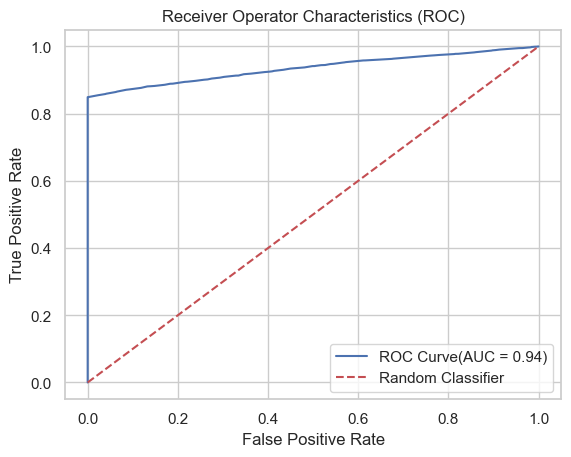

In [377]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  ## [:, 1] for selecting predictive prob. of 1 class
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = "ROC Curve(AUC = %0.2f)"%auc)
plt.plot([0, 1], [0, 1], 'r--', label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics (ROC)")
plt.legend(loc = "lower right")

plt.show()